- [Windows 10 编译 Pycocotools 踩坑记](https://www.jianshu.com/p/de455d653301)

- [COCO数据库简介](https://blog.csdn.net/happyhorizion/article/details/77894205#coco)

微软发布的COCO数据库, 除了图片以外还提供物体检测, 分割(segmentation)和对图像的语义文本描述信息. 
COCO数据库的网址是: 
- MS COCO API - http://mscoco.org/ 
- Github网址 - https://github.com/pdollar/coco 
- 关于API更多的细节在网站: http://mscoco.org/dataset/#download 

数据库提供 Matlab, Python 和 Lua 的 API 接口. 其中 matlab 和 python 的 API 接口可以提供完整的图像标签数据的加载, parsing 和可视化.此外,网站还提供了数据相关的文章, 教程等. 

在使用 COCO 数据库提供的 API 和 demo 时, 需要首先下载 COCO 的图像和标签数据.

- 安装:
    1. 首先解压数据文件: 
        - 图像数据下载到 `coco/images/` 文件夹中 
        - 标签数据下载到 `coco/` 文件夹中. 
    2. matlab, 在 matlab 的默认路径中添加 `coco/MatlabApi` 
    3. Python. 打开终端,将路径切换到 `coco/PythonAPI`下,输入 `make`

- COCO数据集的标注信息

COCO的数据标注信息包括: 
- 类别标志 
- 类别数量区分 
- 像素级的分割 

In [1]:
import cocox
import zipfile

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cocox.root = 'F:/coco'

查看 `coco/images/` 文件夹下的数据：

In [3]:
image_names = cocox.get_image_names()
image_names

['F:/coco/images/test2017.zip',
 'F:/coco/images/train2017',
 'F:/coco/images/train2017.zip',
 'F:/coco/images/unlabeled2017.zip',
 'F:/coco/images/val2017.zip']

查看 `coco/` 文件夹的文件：

In [4]:
import os
dataDir = cocox.root

In [5]:
os.listdir(dataDir)

['annotations', 'images']

我们只需要获取 annotations 的信息（这里都是以 `.zip` 结尾）：

In [6]:
annDir = [z_name for z_name in os.listdir(dataDir) if z_name.endswith('.zip')]
annDir

[]

解压 annotations 的文件：

In [7]:
for ann_name in annDir:
    z = zipfile.ZipFile(dataDir + '/' + ann_name)
    # 全部解压
    z.extractall(dataDir)

In [8]:
# 封装为函数
cocox.unzip_annotations()

UnboundLocalError: local variable 'z' referenced before assignment

In [4]:
# 删除标签的压缩文件
cocox.del_annotations()

由于图片数据比较大，我就不解压了，不过可以通过 `MXNet + zipfile` 来直接获取图片信息。

# 获取图片数据

我以 `test2017.zip` 为例：

In [9]:
image_names

['F:/coco/images/test2017.zip',
 'F:/coco/images/train2017',
 'F:/coco/images/train2017.zip',
 'F:/coco/images/unlabeled2017.zip',
 'F:/coco/images/val2017.zip']

In [10]:
z = zipfile.ZipFile(image_names[0])

In [11]:
# 测试集的图片名称列表
z.namelist()

['test2017/',
 'test2017/000000259564.jpg',
 'test2017/000000344475.jpg',
 'test2017/000000139491.jpg',
 'test2017/000000426648.jpg',
 'test2017/000000563577.jpg',
 'test2017/000000233616.jpg',
 'test2017/000000026923.jpg',
 'test2017/000000510196.jpg',
 'test2017/000000523969.jpg',
 'test2017/000000400725.jpg',
 'test2017/000000166089.jpg',
 'test2017/000000513941.jpg',
 'test2017/000000355340.jpg',
 'test2017/000000466315.jpg',
 'test2017/000000359817.jpg',
 'test2017/000000358375.jpg',
 'test2017/000000438062.jpg',
 'test2017/000000342419.jpg',
 'test2017/000000155660.jpg',
 'test2017/000000211454.jpg',
 'test2017/000000111006.jpg',
 'test2017/000000237311.jpg',
 'test2017/000000187021.jpg',
 'test2017/000000501396.jpg',
 'test2017/000000091554.jpg',
 'test2017/000000480426.jpg',
 'test2017/000000193510.jpg',
 'test2017/000000514963.jpg',
 'test2017/000000159079.jpg',
 'test2017/000000367777.jpg',
 'test2017/000000212729.jpg',
 'test2017/000000524726.jpg',
 'test2017/000000377039.jp

我们可以看出，第一个是目录名，之后的才是图片。下面我们来看看第一张图片：

In [12]:
from mxnet import image

In [13]:
r = z.read(z.namelist()[1])    # bytes
data = image.imdecode(r)       # 转换为 NDArray 数组，可以做数值运算
data


[[[ 87  94  78]
  [ 85  94  77]
  [ 87  96  79]
  ...
  [108  63  44]
  [252 244 233]
  [253 253 253]]

 [[ 86  95  76]
  [ 88  97  78]
  [ 85  94  75]
  ...
  [ 55  14   0]
  [150  94  81]
  [252 245 216]]

 [[ 90  99  78]
  [ 89  98  77]
  [ 89  98  77]
  ...
  [ 63  37  12]
  [ 90  30   6]
  [149  83  61]]

 ...

 [[ 86 104  82]
  [ 89 102  82]
  [ 84 102  80]
  ...
  [ 50  62  40]
  [ 50  61  45]
  [ 51  58  50]]

 [[ 89 101  77]
  [ 87  96  75]
  [ 89 104  83]
  ...
  [ 54  63  42]
  [ 49  53  39]
  [ 53  54  48]]

 [[ 96 100  77]
  [ 94  97  76]
  [ 88 103  82]
  ...
  [ 44  58  32]
  [ 45  57  37]
  [ 49  57  42]]]
<NDArray 480x640x3 @cpu(0)>

In [14]:
x = data.asnumpy()   # 转换为 array

Populating the interactive namespace from numpy and matplotlib


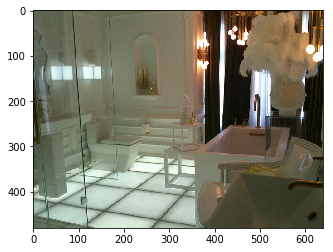

In [15]:
# 显示图片
%pylab inline 
plt.imshow(x)

为此，我们可以将其封装为一个迭代器：`cocox.data_iter(dataType)`

# 获取标签信息（利用官方给定教程）

- 安装 python API：
```sh
pip install -U pycocotools
```

Windows 下有许多的坑：[Windows 10 编译 Pycocotools 踩坑记](https://www.jianshu.com/p/de455d653301)

In [16]:
!pip install -U pycocotools

Requirement already up-to-date: pycocotools in c:\programdata\anaconda3\lib\site-packages


In [17]:
%pylab inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


这里有一个坑 (由 PIL 引发) `import skimage.io as io` 在 Windows 下可能会报错，我的解决办法是：
- 先卸载  Pillow，然后重新安装即可。

- 插曲：PIL(Python Imaging Library)是Python一个强大方便的图像处理库，名气也比较大。Pillow 是 PIL 的一个派生分支，但如今已经发展成为比 PIL 本身更具活力的图像处理库。

In [18]:
dataDir = cocox.root
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

In [19]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.74s)
creating index...
index created!


In [20]:
COCO??

`COCO` 是一个类：
```json
Constructor of Microsoft COCO helper class for reading and visualizing annotations.
:param annotation_file (str): location of annotation file
:param image_folder (str): location to the folder that hosts images.
```

## display COCO categories and supercategories

In [21]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
accessory food sports appliance furniture person kitchen outdoor animal electronic indoor vehicle


In [33]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds=[335328])
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

In [23]:
img

{'coco_url': 'http://images.cocodataset.org/val2017/000000335328.jpg',
 'date_captured': '2013-11-20 19:29:37',
 'file_name': '000000335328.jpg',
 'flickr_url': 'http://farm3.staticflickr.com/2079/2128089396_ddd988a59a_z.jpg',
 'height': 640,
 'id': 335328,
 'license': 4,
 'width': 512}

官方给的这个代码需要将图片数据集解压：
```py
# load and display image
# use url to load image
# I = io.imread(img['coco_url'])
I = io.imread('%s/images/%s/%s' % (dataDir, dataType, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()
```

我们可以使用 `zipfile` 模块直接读取图片，而无须解压：

In [24]:
image_names[-1]

'F:/coco/images/val2017.zip'

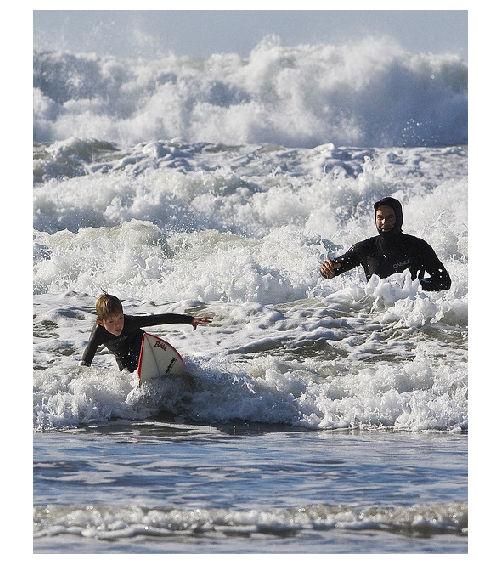

In [25]:
val_z = zipfile.ZipFile(image_names[-1])
I = image.imdecode(val_z.read('%s/%s' % (dataType, img['file_name']))).asnumpy()
plt.axis('off')
plt.imshow(I)
plt.show()

## load and display instance annotations

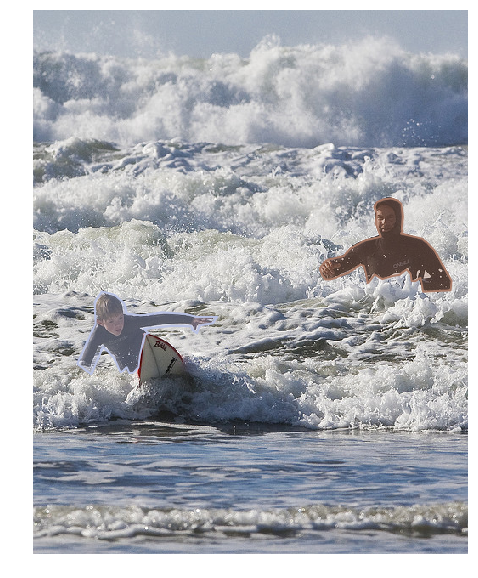

In [26]:
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

## initialize COCO api for person keypoints annotations

In [27]:
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir, dataType)
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


## load and display keypoints annotations

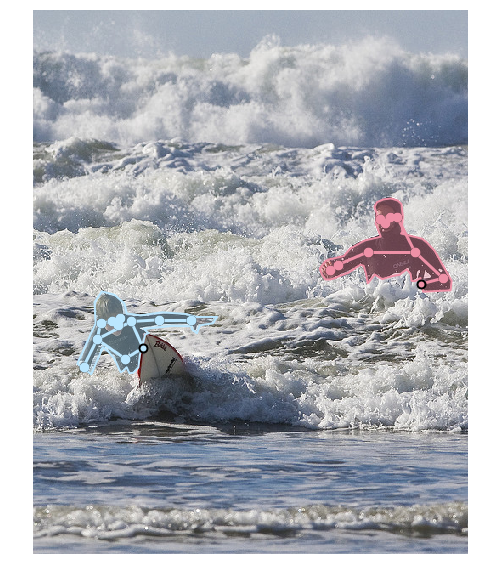

In [28]:
plt.imshow(I)
plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

## initialize COCO api for caption annotations

In [29]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir, dataType)
coco_caps = COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


## load and display caption annotations

A couple of people riding waves on top of boards.
a couple of people that are surfing in water
A man and a young child in wet suits surfing in the ocean.
a man and small child standing on a surf board  and riding some waves
A young boy on a surfboard being taught to surf.


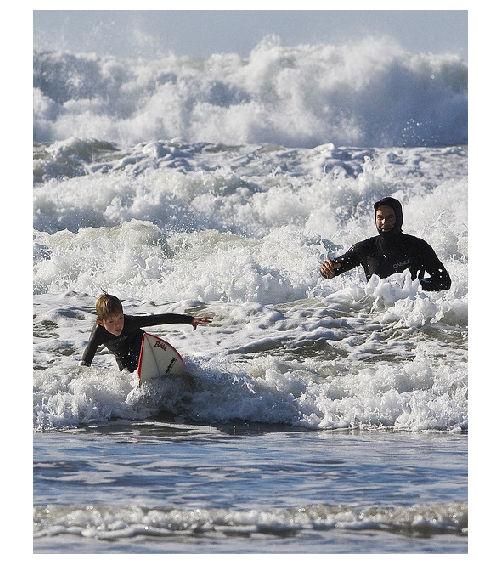

In [30]:
annIds = coco_caps.getAnnIds(imgIds=img['id'])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()